### Analyzing the gas of the jellyfish galaxy candidates

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import eagleSqlTools as sql
con = sql.connect("nkl161", password="FCGxrt20")

In [3]:
jellyfish_ID = np.genfromtxt('CandidateIDs.dat')

In [4]:
# Initial empty list
jellyfish_tree = []

# SQL query
for i in range(len(jellyfish_ID)):
    query = """
    select
        tree.galaxyid as ID,
        tree.MassType_Gas as total_gas,
        tree.SF_Mass,
        tree.NSF_Mass,
        tree.redshift as z,
        snap.lookbacktime as lbt
    from
        RefL0100N1504_SubHalo as jelly,
        RefL0100N1504_SubHalo as tree,
        Snapshots as snap
    where
        jelly.galaxyid = %d
        and
        ((tree.snapnum >  jelly.snapnum and jelly.galaxyid between tree.galaxyid and tree.topleafid) or
        (tree.snapnum <= jelly.snapnum and tree.galaxyid between jelly.galaxyid and jelly.topleafid))
        and
        tree.snapnum = snap.snapnum
    order by
        tree.redshift
    """%(jellyfish_ID[i])

    output = sql.execute_query(con, query)
    jellyfish_tree.append(output)

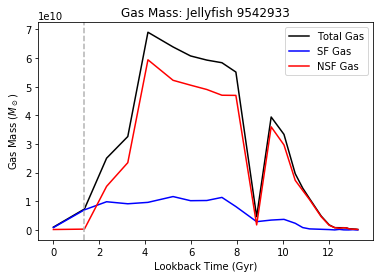

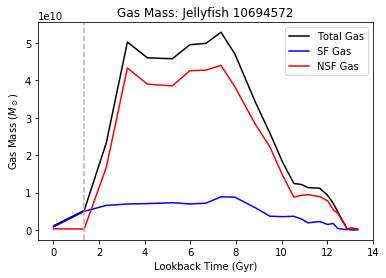

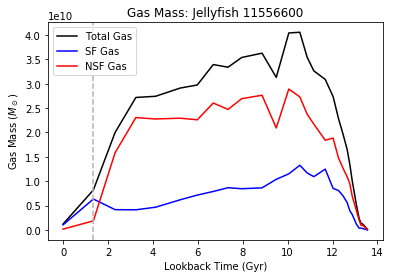

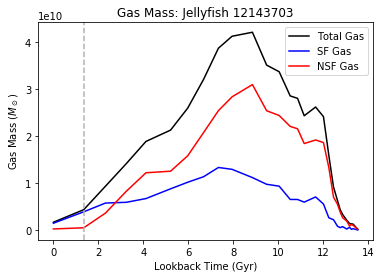

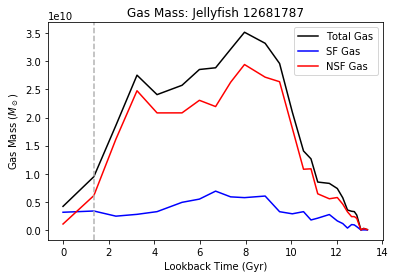

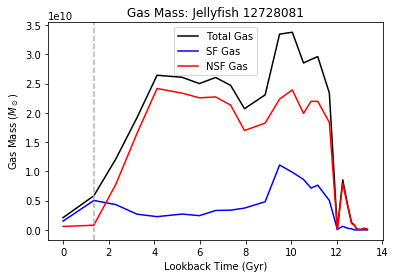

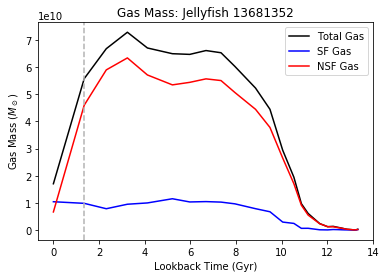

In [11]:
for i in range(len(jellyfish_tree)):
    plt.plot(jellyfish_tree[i]['lbt'], jellyfish_tree[i]['total_gas'], 'k-', label='Total Gas')
    plt.plot(jellyfish_tree[i]['lbt'], jellyfish_tree[i]['SF_Mass'], 'b-', label='SF Gas')
    plt.plot(jellyfish_tree[i]['lbt'], jellyfish_tree[i]['NSF_Mass'], 'r-', label='NSF Gas')
    plt.axvline(1.35, 0,8, linestyle='--', c='0.7')
    plt.xlabel('Lookback Time (Gyr)')
    plt.ylabel('Gas Mass ($M_\odot$)')
    plt.legend()
    plt.title('Gas Mass: Jellyfish '+str(jellyfish_tree[i]['ID'][1]))
    plt.savefig('./Gas/'+str(jellyfish_tree[i]['ID'][1])+'_GasvLBT.png')
    plt.show()

Verify that the total mass is the same as the SF + NSF

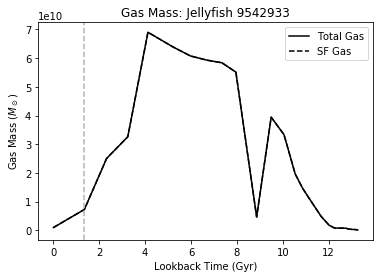

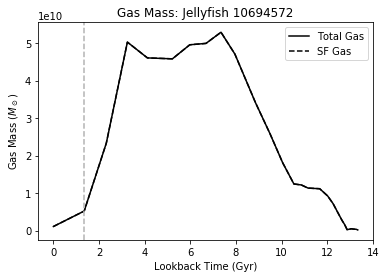

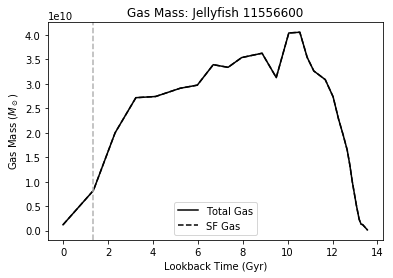

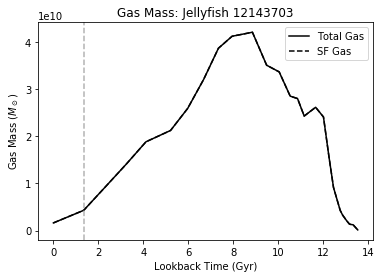

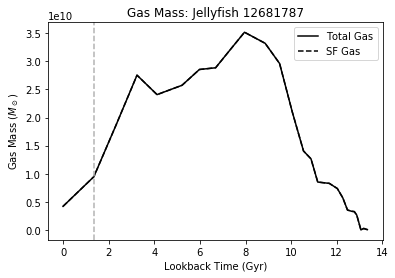

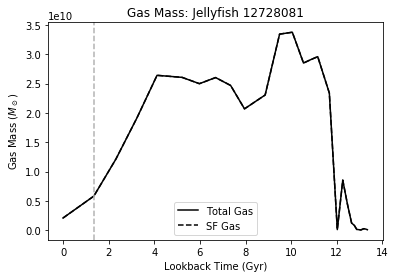

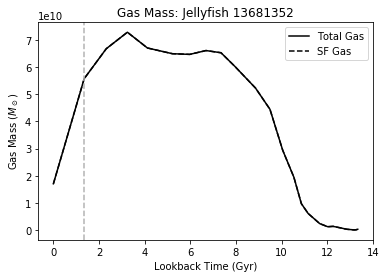

In [10]:
for i in range(len(jellyfish_tree)):
    plt.plot(jellyfish_tree[i]['lbt'], jellyfish_tree[i]['total_gas'], 'k-', label='Total Gas')
    plt.plot(jellyfish_tree[i]['lbt'], jellyfish_tree[i]['SF_Mass']+jellyfish_tree[i]['NSF_Mass'], 'k--', label='SF Gas')
    plt.axvline(1.35, 0,8, linestyle='--', c='0.7')
    plt.xlabel('Lookback Time (Gyr)')
    plt.ylabel('Gas Mass ($M_\odot$)')
    plt.legend()
    plt.title('Gas Mass: Jellyfish '+str(jellyfish_tree[i]['ID'][1]))
    plt.show()